<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Mohammad Mahdi Abootorabi <br>
   **Student ID**: 98105557 <br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [493]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

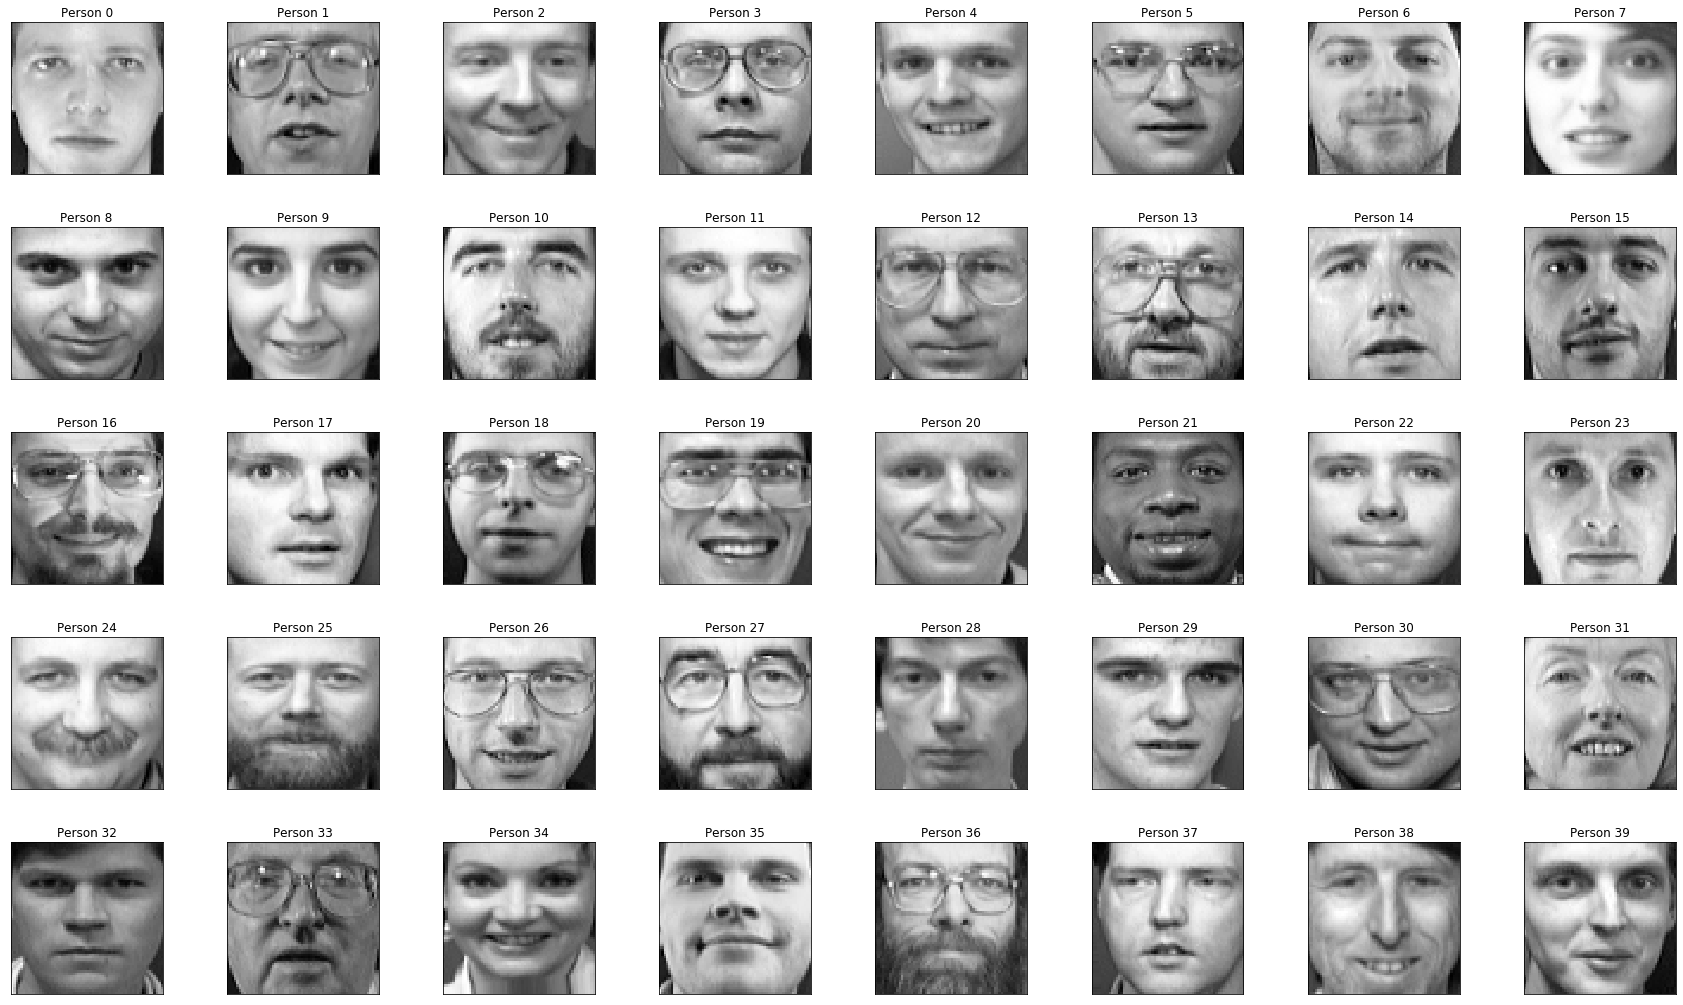

In [494]:
#TODO
n_row, n_col = 5, 8
index_dict = {i: (faces.target == i).nonzero()[0][0] for i in np.unique(faces.target)}
plt.figure(figsize=(3 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(faces.data[index_dict[i]].reshape(faces.images[0].shape), cmap=plt.cm.gray)
    plt.title(f"Person {i}", size=12)
    plt.xticks(())
    plt.yticks(())

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [495]:
#TODO
from sklearn.model_selection import train_test_split

X = faces.data

y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (280, 4096)
y_train: (280,)
X_test: (120, 4096)
y_test: (120,)


In [496]:
y.shape

(400,)

<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [497]:
#TODO
from sklearn import decomposition

# We chose number of components in a way that 99% variance of the input that is supposed to be explained 
# by the generated components. And so on the model it self determines how many components are needed. As you will see for 99% of
# variance being explained we need 200 components. So dimension reduced well.

pca = decomposition.PCA(n_components=0.99)
pca.fit(X_train)
print(f'Number of components chosen {pca.components_.shape[0]}')

Number of components chosen 200


<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

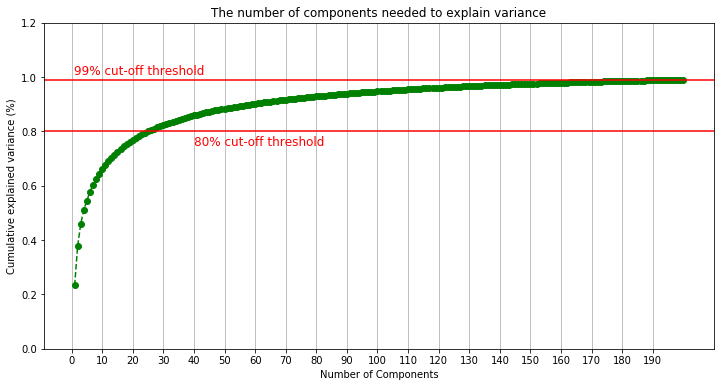

In [498]:
#TODO
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x_p = np.arange(1, pca.components_.shape[0] + 1, step=1)
y_p = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.2)
plt.plot(x_p, y_p, marker='o', linestyle='--', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.components_.shape[0], step=10))
plt.ylabel('Cumulative explained variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.8, 1.01, '99% cut-off threshold', color = 'red', fontsize=12)

plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(40, 0.75, '80% cut-off threshold', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

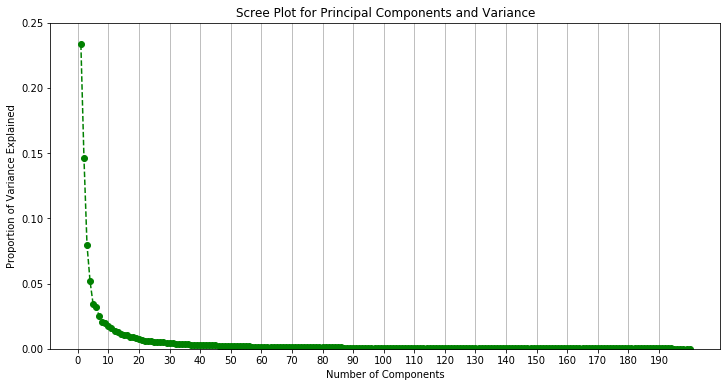

In [499]:
#TODO
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

plt.ylim(0.0, 0.25)
plt.plot(np.arange(1, pca.components_.shape[0] + 1, step=1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.components_.shape[0], step=10))
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot for Principal Components and Variance')


ax.grid(axis='x')
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

Mean vector is actually the mean of all training examples that we need in process of pca for standardization. if we have samples $\Gamma_1, \Gamma_2, ... , \Gamma_M$, where $M$ is the total number of images in the training set. <br>
The mean is given by
$$\Psi = \frac{1}{M} \Sigma_{n=1}^{M}\Gamma_n$$
And in process of pca we subtract images from mean at the first. And this image shows mean of images. In that image, eyes are clear but the mouth is not clear and it's an ambiguous face.

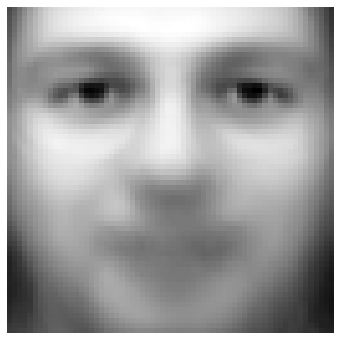

In [500]:
#TODO
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.gray)
axes.axis('off')
fig.canvas.draw()

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

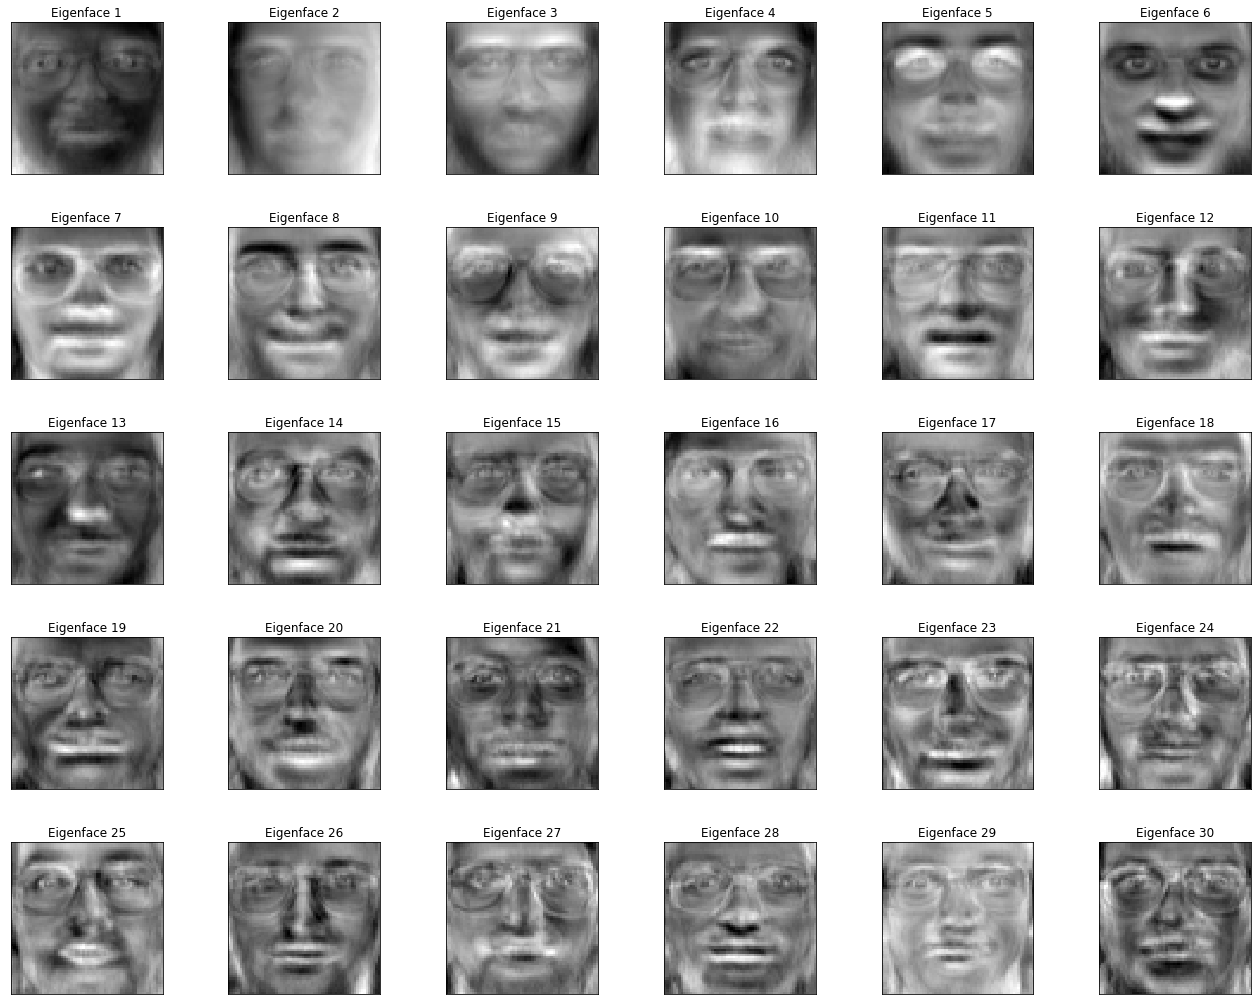

In [501]:
#TODO
# The eigenfaces themselves form a basis set of all images used to construct the covariance matrix.
# They can be used and their goal is that anyone’s face can be reconstructed from a suitable linear combination of eigenvectors.
# Each of them highlight a certain type of feature. and they can be used for reconstructino or generation or classifying faces.
# Each of them try to focus on a special features, Some on glasses, some on nose and ...
# It seems that first components focus mainly on lighting conditions. but the others focus on recognize patterns for features like 
# nose or eyes or ... 
n_row, n_col = 5, 6
plt.figure(figsize=(3 * n_col, 3 * n_row))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.gray)
    plt.title(f"Eigenface {i + 1}", size=12)
    plt.xticks(())
    plt.yticks(())

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [502]:
#TODO
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(280, 200)
(120, 200)


<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [503]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#TODO
grid = [
    {
        'C': list(np.logspace(-3, 5, 9)),
        'kernel': ['poly'],
        'gamma': list(np.logspace(-4, 4, 9)),
        'degree': [1, 2, 3, 4, 5], 
    },
    {
        'C': list(np.logspace(-3, 5, 9)),
        'kernel': ['rbf', 'sigmoid'],
        'gamma': list(np.logspace(-4, 4, 9)),
    },
    {
        'C': list(np.logspace(-3, 5, 9)),
        'kernel': ['linear'],
    }
]

# if we don't pass cv to 2. the default is 5-fold cv. and as our data is small. there is warning 
# that The least populated class in y has only 2 members, which is less than n_splits=5. the accuracy in cv=5 option is 0.953
# but becasue of small dfataset beeter to nut use it.
clf = GridSearchCV(svm.SVC(), grid, cv=2)
clf.fit(X_train_pca, y_train)
print(f"Best estimator found by grid search: {clf.best_params_}")
print(f"Best score: {clf.best_score_}")

Best estimator found by grid search: {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.8892857142857142


In [504]:
best_parmas = clf.best_params_
best_clf = svm.SVC(**best_parmas)
best_clf.fit(X_train_pca, y_train)

SVC(C=100.0, gamma=0.001)

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

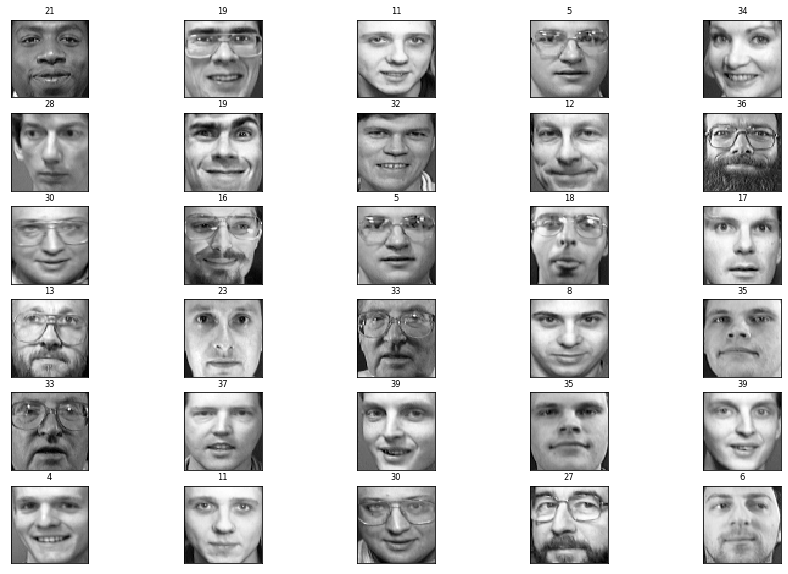

In [505]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.gray)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

In [506]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#TODO

y1 = label_binarize(y, classes=[i for i in range(40)])
n_classes = y1.shape[1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y1, test_size=0.3, random_state=5)
X2_train_pca = pca.transform(X2_train)
X2_test_pca = pca.transform(X2_test)

# For each class
classifier = OneVsRestClassifier(
    svm.SVC(**best_parmas)
)
y_score = classifier.fit(X2_train_pca, y2_train).decision_function(X2_test_pca)

In [507]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y2_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y2_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y2_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y2_test, y_score, average="micro")

In [508]:
ls = recall["micro"] / precision["micro"] 
idx = np.abs(ls - 1).argmin()
print(f"recall: {recall['micro'][idx]}")
print(f"precision: {precision['micro'][idx]}")

recall: 0.95
precision: 0.95


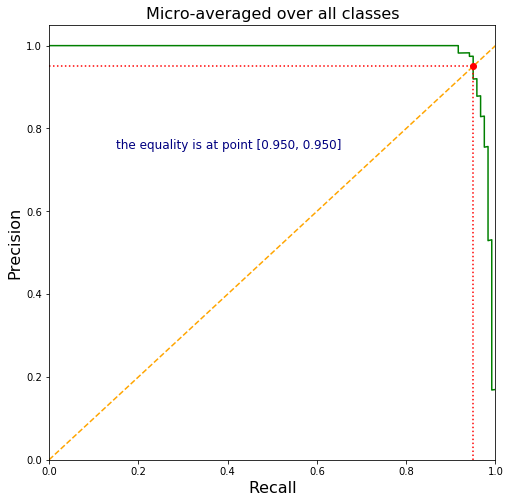

In [509]:
# We use micro averaging
plt.rcParams["figure.figsize"] = (8, 8)

fig, ax = plt.subplots()

plt.ylim(0.0, 1.2)
plt.plot(recall["micro"], precision["micro"], color='g')

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title("Micro-averaged over all classes", fontsize=16)

plt.plot([0, 1], [0, 1], color="orange",  linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(recall['micro'][idx], precision['micro'][idx], "ro")
plt.plot([recall['micro'][idx], precision['micro'][idx]], [0, precision['micro'][idx]], "r:")
plt.plot([0, recall['micro'][idx]], [recall['micro'][idx], precision['micro'][idx]], "r:")

plt.text(0.15, 0.75, "the equality is at point [{0:.3f}, {1:.3f}]".format(recall['micro'][idx], precision['micro'][idx]), color = 'navy', fontsize=12)


plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

recall at the above threshold = 0.95

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [510]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#TODO: Train the random forest on the data
rnd_clf = RandomForestClassifier(n_estimators=30, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8583333333333333

In [511]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
#TODO: plot roc_curve and print roc_auc_score for svm and random forest classifiers
# SVM
# We use micro averaging
def plot_roc_curve_auc(y_test, y_score, model_name):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y1.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], color="orange", label="micro-average ROC curve (area = %0.2f)" % roc_auc["micro"], linewidth=5,)
    plt.plot(fpr["macro"], tpr["macro"], color="red", label="macro-average ROC curve (area = %0.2f)" % roc_auc["macro"], linestyle=":", linewidth=5,)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title("ROC curve", fontsize=16)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower right")
    plt.show()
    print(f"Micro-average AUC {model_name} = ", roc_auc["micro"])
    print(f"Macro-average AUC {model_name} = ", roc_auc["macro"])

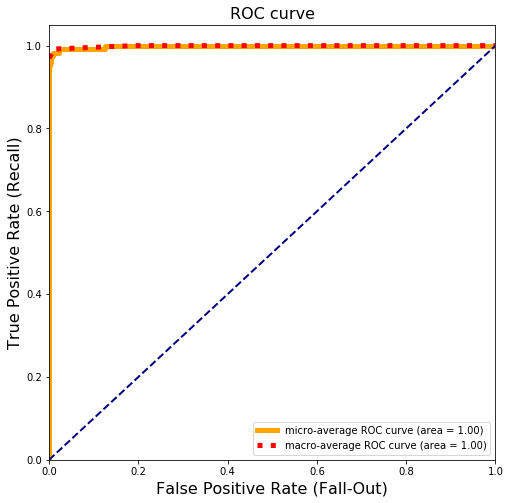

Micro-average AUC SVM =  0.9985950854700855
Macro-average AUC SVM =  0.9990659606094389


In [512]:
plot_roc_curve_auc(y2_test, y_score, 'SVM')

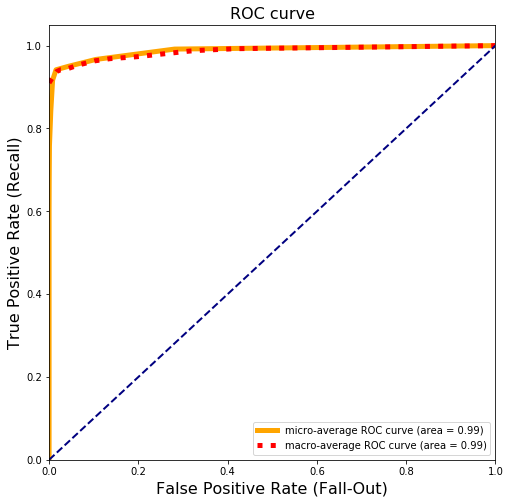

Micro-average AUC Random Forest =  0.9873709045584045
Macro-average AUC Random Forest =  0.9860458937198067


In [513]:
ls = []
for i in y_test:
    inner_ls = n_classes * [0]
    inner_ls[i] = 1
    ls.append(inner_ls)
y_test_binarize = np.array(ls)
y_score_rnd = rnd_clf.predict_proba(X_test)
plot_roc_curve_auc(y_test_binarize, y_score_rnd, 'Random Forest')

As you see, our SVM model works a little better than random forest

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [514]:
from sklearn.metrics import classification_report

#TODO
y_pred_test = best_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       0.67      0.67      0.67         3
          16       1.00      1.00      1.00         1
          17       1.00    

As you can see accuracy is 0.94 and macro average of f1-score is 0.94 which is really good. f1-score as we know is harmonic mean of the precision and recall and so on for evaulation model it is very important and as you see for almost classes it is near 1. About precision and recall we knew a lot in the classes. f1-score for most classes are equal to 1. for worst class it is equal to 0.5. that class has 3 samples in test set.
This report indictas precision and recall and f1-score for each classes in a given dataset. also support column indicates how many samples are coming from that class. It is also make an average from this 3 metrics too at the end. As you se we have 120 samples in test set and 40 class. so in some classes they are only 1 sample, so we can not rely much on the f1-score or precision or recall metric in specific classes. but I think we can rely on average and general report of it. As you see we have high precision and recall and so high f1-score. Thus, our model works very well. But as we told, for more accuracte analysis, our test dataset must be larger so we can talk more about perofrmance of model on each classes. but with this function there is complete report as you see about your performance of model.

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [515]:
# TODO: calculate conf_mx then print it
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred_test)
print(conf_mx)

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]


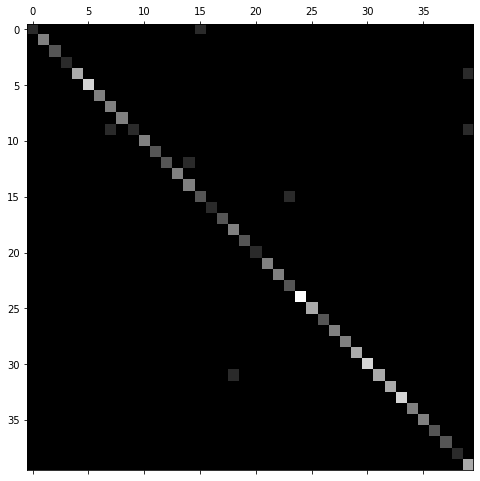

In [516]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [517]:
# TODO: calculate norm_conf_mx then print it
norm_conf_mx = conf_mx.astype('float') / conf_mx.sum(axis=1)[:, np.newaxis]
print(norm_conf_mx)

[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  1.  0. ]
 [0.  0.  0.  ... 0.  0.  1. ]]


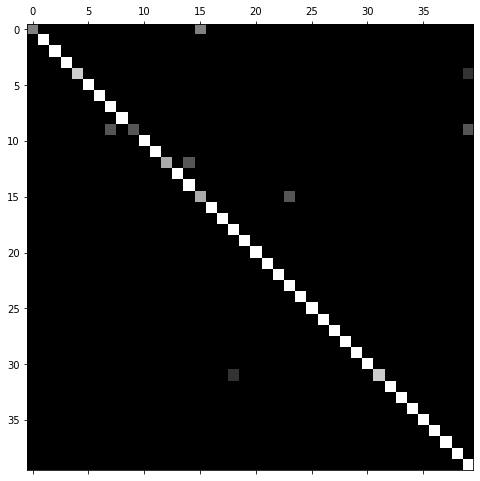

In [518]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()